# How to use OP_Map for extracting element forces from an OP2 file.
This notebook will guide you through the capabilities of OP_Map by means of clear examples.

The notebook extract results from the .op2 file of a Finite Element Models stored in /data/


------------------
## INITIAL STEPS


### If working on Google Colab, proceed as follows

In [10]:
# Mount your Google Drive in Google Colab
from google.colab import drive      # Mounting the google drive in google colab
drive.mount('/content/gdrive/')

# Append the path to the 'OP_Map.py' file to your system path
import sys
sys.path.append('gdrive/MyDrive/Colab_Notebooks/OP_Map/')

# Install pyNastran library (not installed by default in Colab)
!pip install pyNastran

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### Import Model class from OP-Map library

In [1]:
# Import Model class from OP-Map library

from OP_Map import Model

## What kind of elements are you dealing with?
Depending on whether you aredealing with 2D elements (CQUAD4 or CTRIA3) or 1D elements (CROD) go to part A or part B respectively.

## PART A - Extracting loads from 2D elements (CQUAD4 and CTRIA3)

### Loading element forces from .op2 file
First initialize a variable (e.g. M100_model) with the Model class of OP_Map, passing in the .op2 file and the element-mapping .json file. Note that an excel file with the same name of the .op2 file is created for storing results there everytime you chose to do so when extracting resutls.

Then, use:
+ <font color=blue>.r_op2_2D_eforces()</font>  method for loading loads in the ELEMENT COORDINATE system

+ <font color=blue>.r_op2_2D_eforces_matcoord()</font>  method for loading loads in the MATERIAL COORDINATE system

In [2]:
# Initialize a variable (e.g. M100_model) with the Model class, passing in the .op2 file and element-mapping .json file

# NOTE that an excel file with the same name of the .op2 file is created for storing results there.

M100_model = Model('data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.op2',
                   'data/M100-HTP-mapping.json')

# Loading element loads in the element coordinate system
#M100_model.r_op2_2D_eforces()

# Loading element loads in material coordinate system
M100_model.r_op2_2D_eforces_matcoord('data/M100-OPTISTRUCT/M100-HTP-LL1.1_Issue2.0.bdf')

Model initialized with OP_Map library, version 1.2
Created excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


Number of load cases in the op2 file: 36
Loaded element forces of CTRIA3 and CQUAD4 elements in MATERIAL COORDINATE system from OP2 file: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.op2



### Picking up and Plotting data from .op2 file
#### List the load cases contained in the .op2 file

In [3]:
# List the load cases contained in the .op2 file
# If excel = True, results will be saved in the excel file created at variable initialization

M100_model.list_lc(excel = True);

List of load cases contained in the OP2 file: [10004, 10021, 10022, 10023, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 15004, 15021, 15022, 15023, 15025, 15026, 15027, 15028, 15029, 15030, 15031, 15032, 17004, 17021, 17022, 17023, 17025, 17026, 17027, 17028, 17029, 17030, 17031, 17032]
Results saved in excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


#### Plot the element-mapping of a specific componente (as defined in the .json file)

Results saved in excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


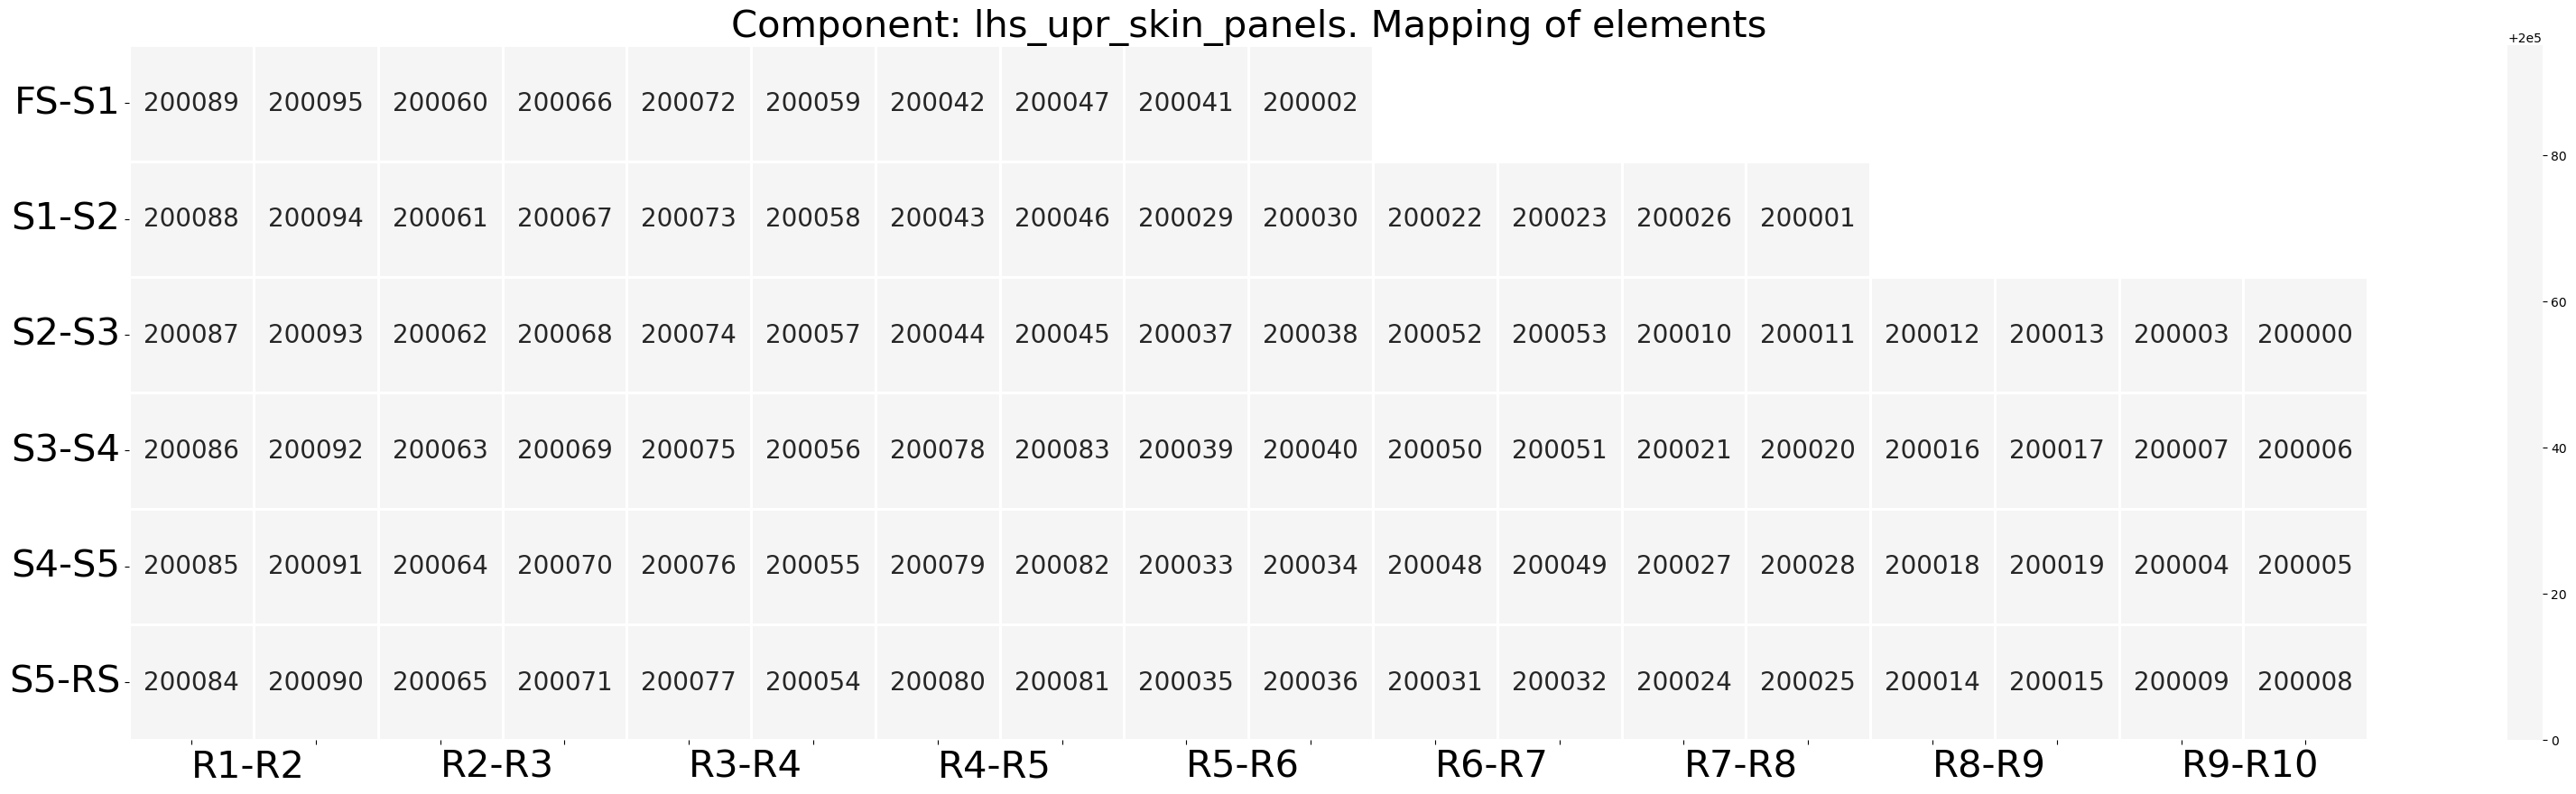

In [4]:
# Plot the element-mapping of a specific componente (as defined in the .json file)
# If excel = True, results will be saved in the excel file created at variable initialization

M100_model.plot_component_mapping('lhs_upr_skin_panels', excel = True)

#### Plotting mappings of element forces for a component, load case and field value (acc. to order in .op2/.f06 file)

Results saved in excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


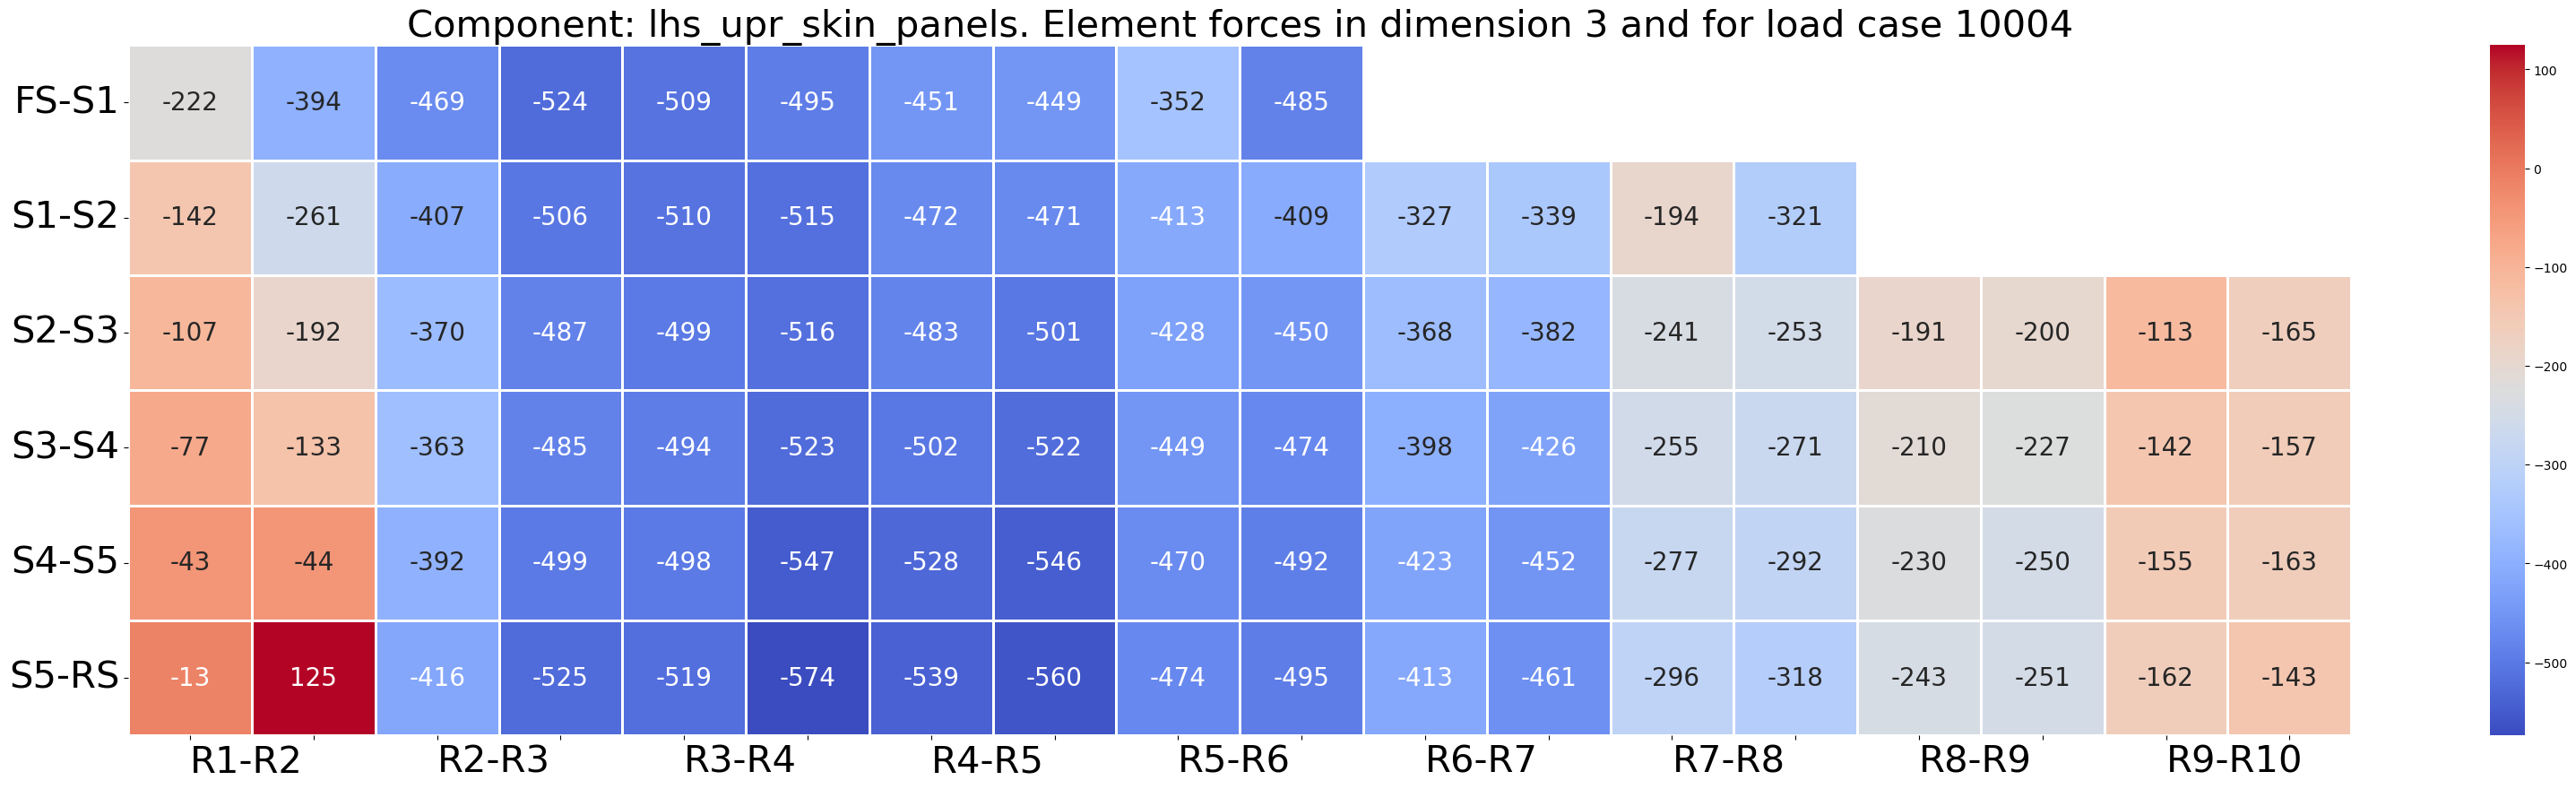

In [5]:
# Plotting mappings of element forces for a component, load case and field value
# Field value components acc. to order in .op2/.f06 file
# If excel = True, results will be saved in the excel file created at variable initialization

M100_model.plot_2D_eforces(10004, 'lhs_upr_skin_panels', 3, excel=True)

#### Plotting mappings of maximum elemment forces and CLC for a specific component for all load cases in the .op2 file

Results saved in excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


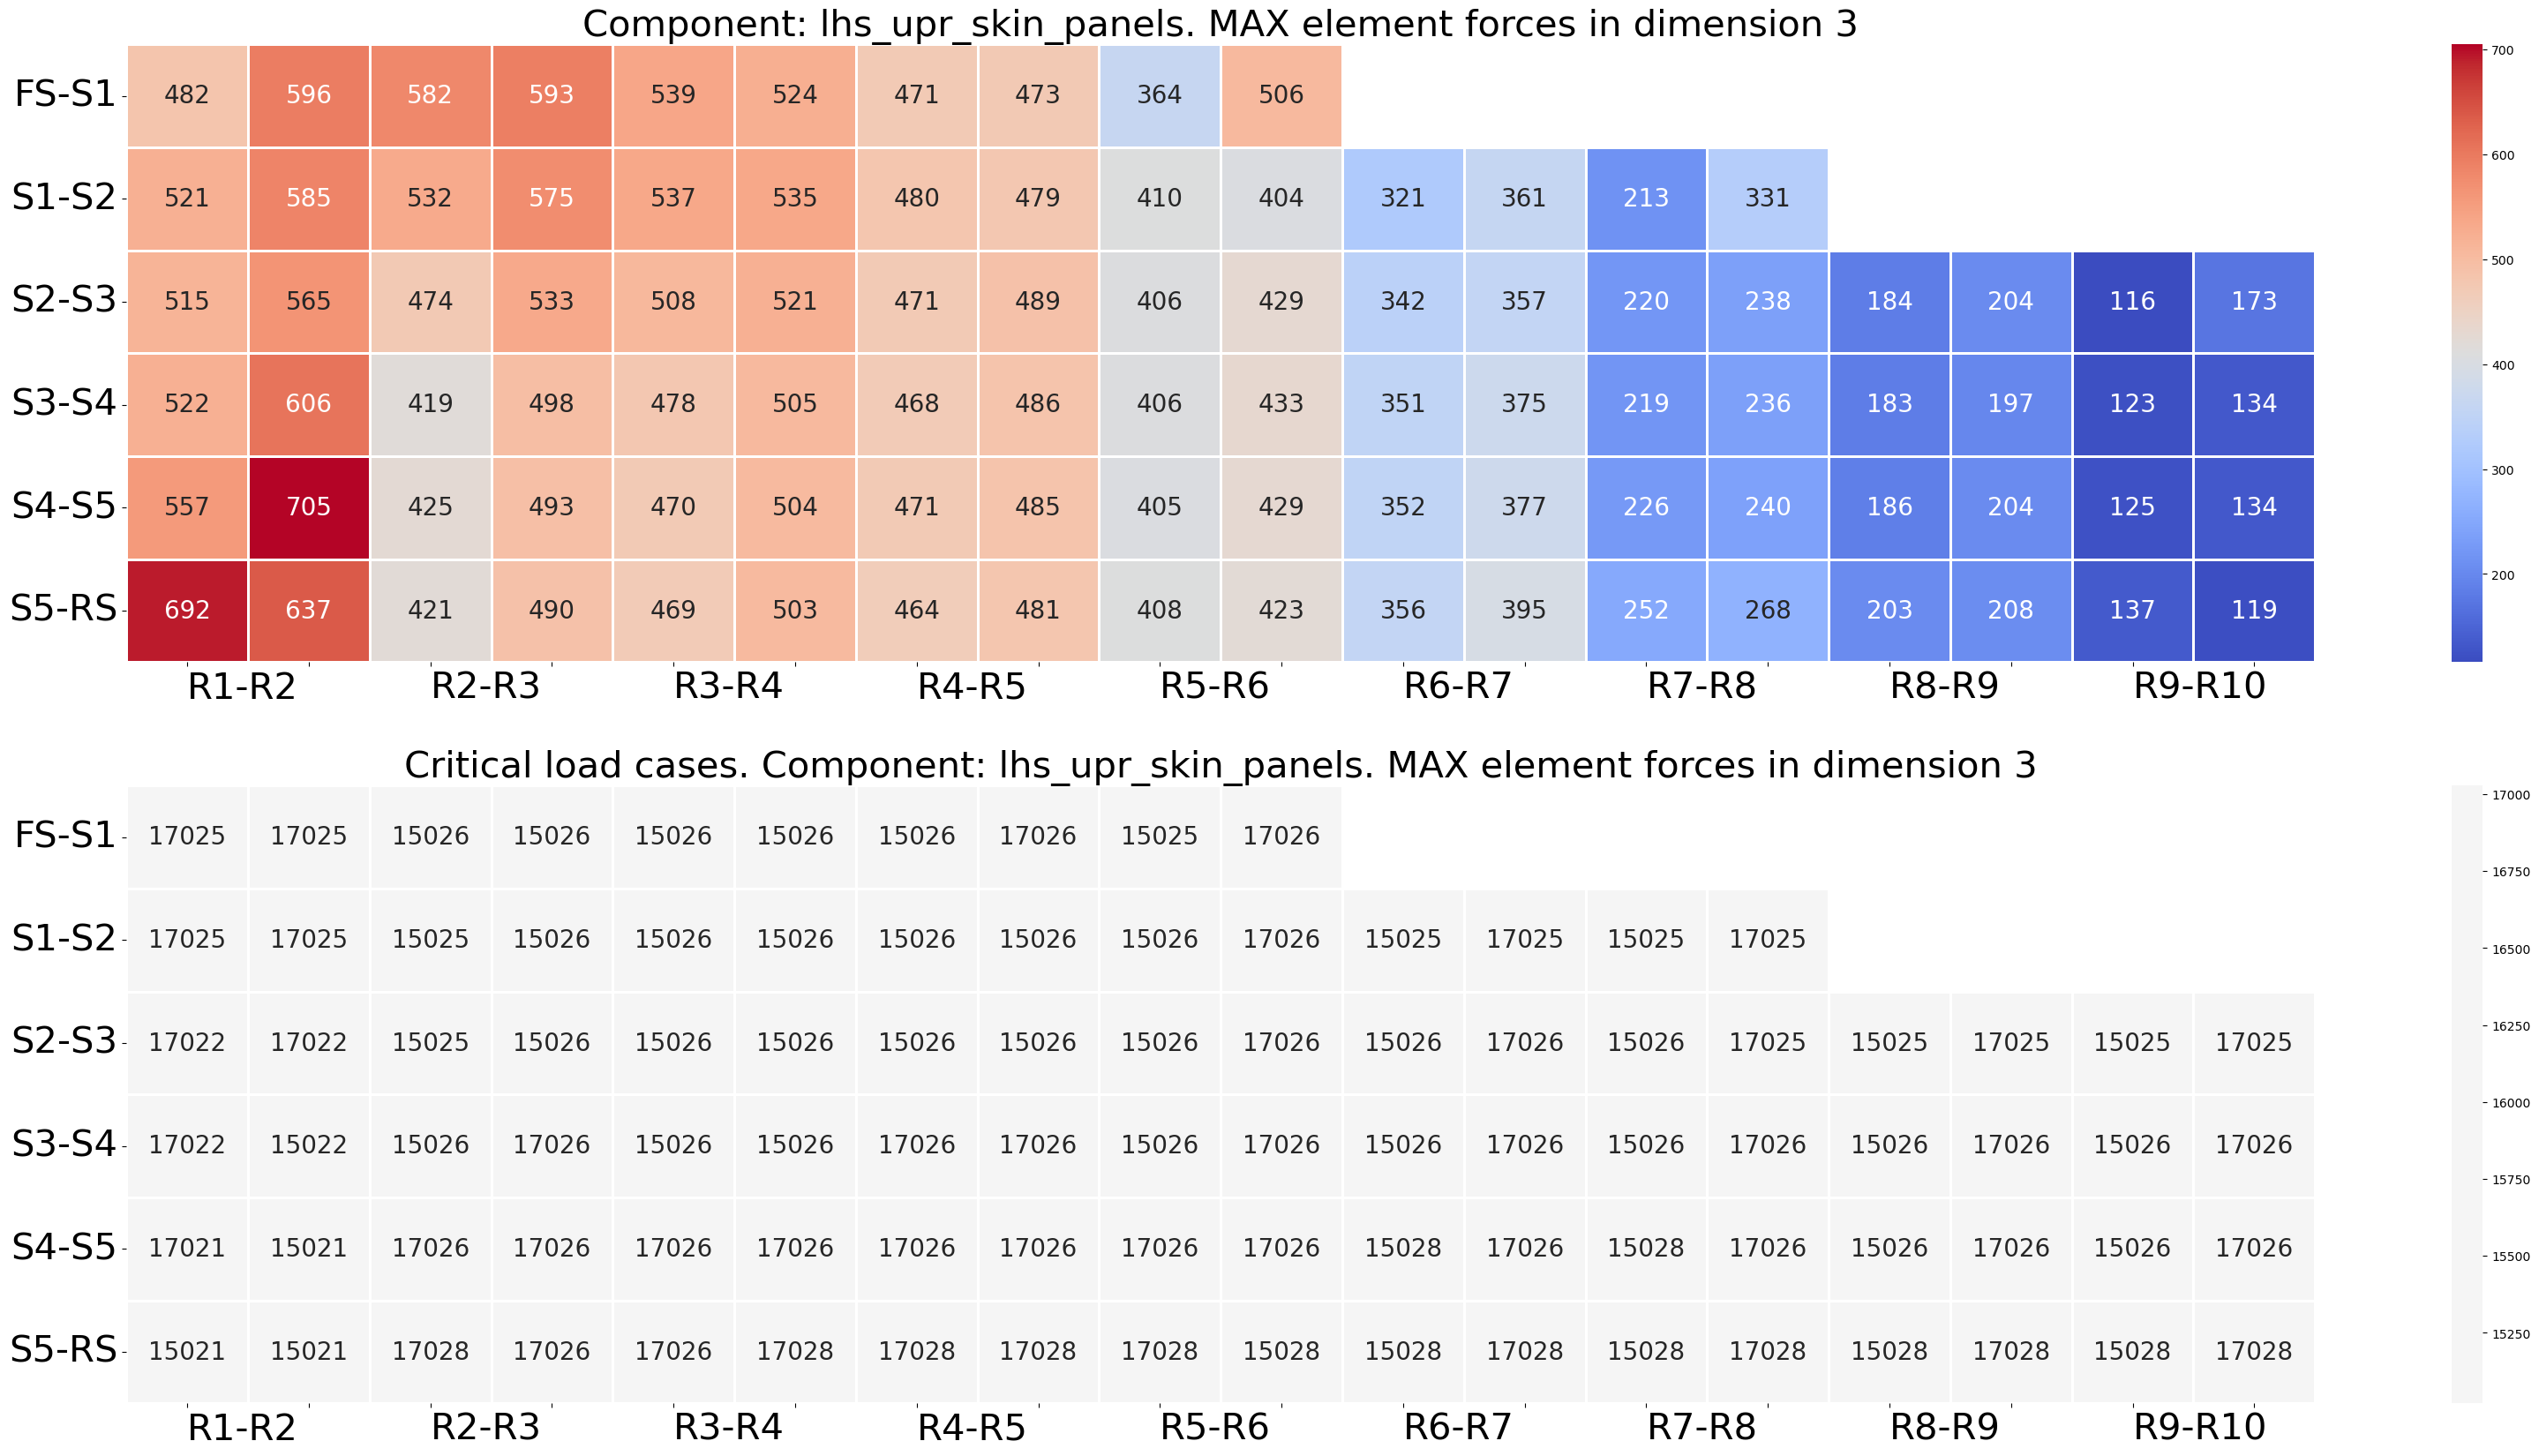

In [6]:
# Plotting mappings of maximum elemment forces and CLC for a specific component for all load cases in the .op2 file
# Field value components acc. to order in .op2/.f06 file
# If excel = True, results will be saved in the excel file created at variable initialization

M100_model.plot_env_2D_eforces('lhs_upr_skin_panels', 'MAX', 3, excel=True)

------------
## PART B - 1D Elements
### Loading element forces from crod elements
First initialize a variable (e.g. M100_model) with the Model class, passing in the .op2 file and the element-mapping .json file. Note that an excel file with the same name of the .op2 file is created for storing results there everytime you chose to do so when extracting resutls.

Then load the forces into the initialized variable.

In [7]:
# Initialize a variable (e.g. M100_model) with the Model class, passing in the .op2 file and
# element-mapping .json file

# NOTE that an excel file with the same name of the .op2 file has been created for storing results there.

M100_model = Model('data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.op2', 'data/M100-HTP-mapping-2.json')

# Read into the initialized variable the values of the element forces
M100_model.r_op2_1D_eforces()     # for crod elements

Model initialized with OP_Map library, version 1.2
Created excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


Number of load cases in the op2 file: 36
Loaded element forces of CROD elements in ELEMENT COORDINATE system from OP2 file: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.op2


#### List the load cases contained in the .op2 file

In [8]:
# List the load cases contained in the .op2 file
# If excel = True, results will be saved in the excel file created at variable initialization

M100_model.list_lc(excel = True);

List of load cases contained in the OP2 file: [10004, 10021, 10022, 10023, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 15004, 15021, 15022, 15023, 15025, 15026, 15027, 15028, 15029, 15030, 15031, 15032, 17004, 17021, 17022, 17023, 17025, 17026, 17027, 17028, 17029, 17030, 17031, 17032]
Results saved in excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


Results saved in excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


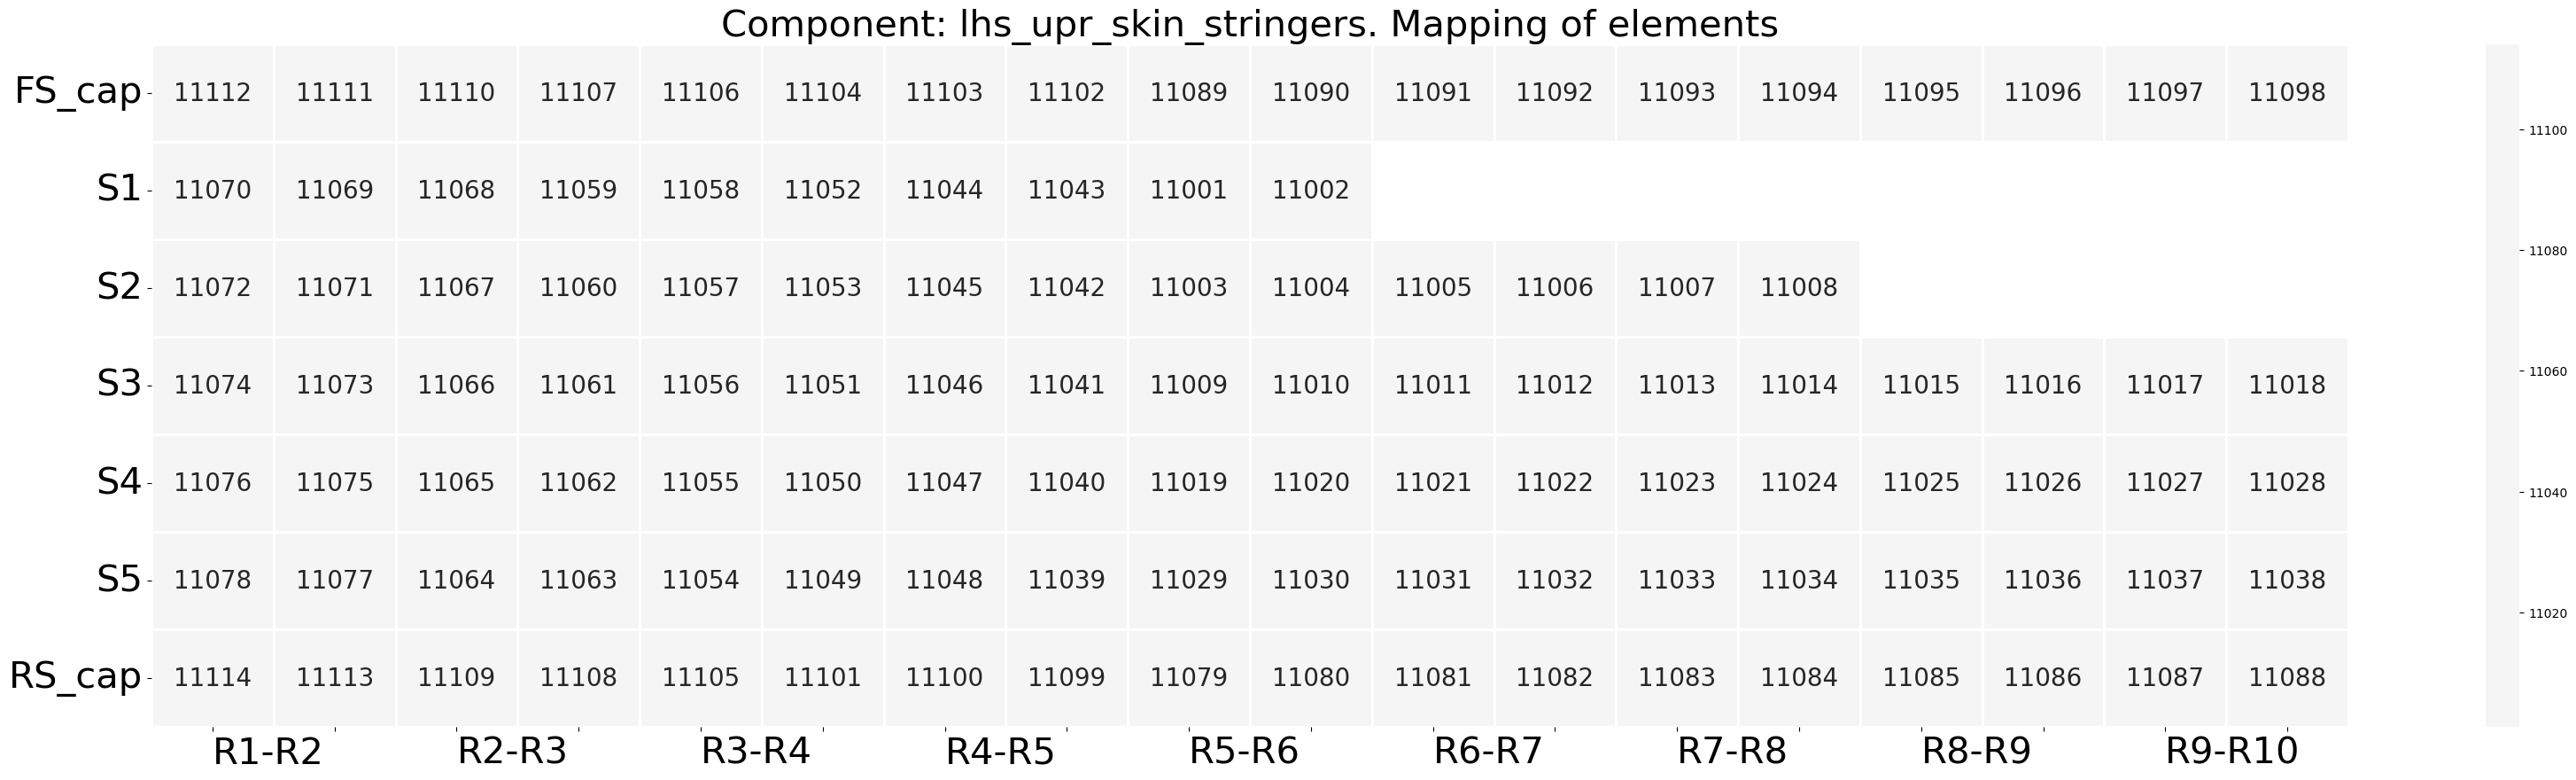

In [9]:
# Plot the element-mapping of a specific componente (as defined in the .json file)
# If excel = True, results will be saved in the excel file created at variable initialization

M100_model.plot_component_mapping('lhs_upr_skin_stringers', excel = True)

Results saved in excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


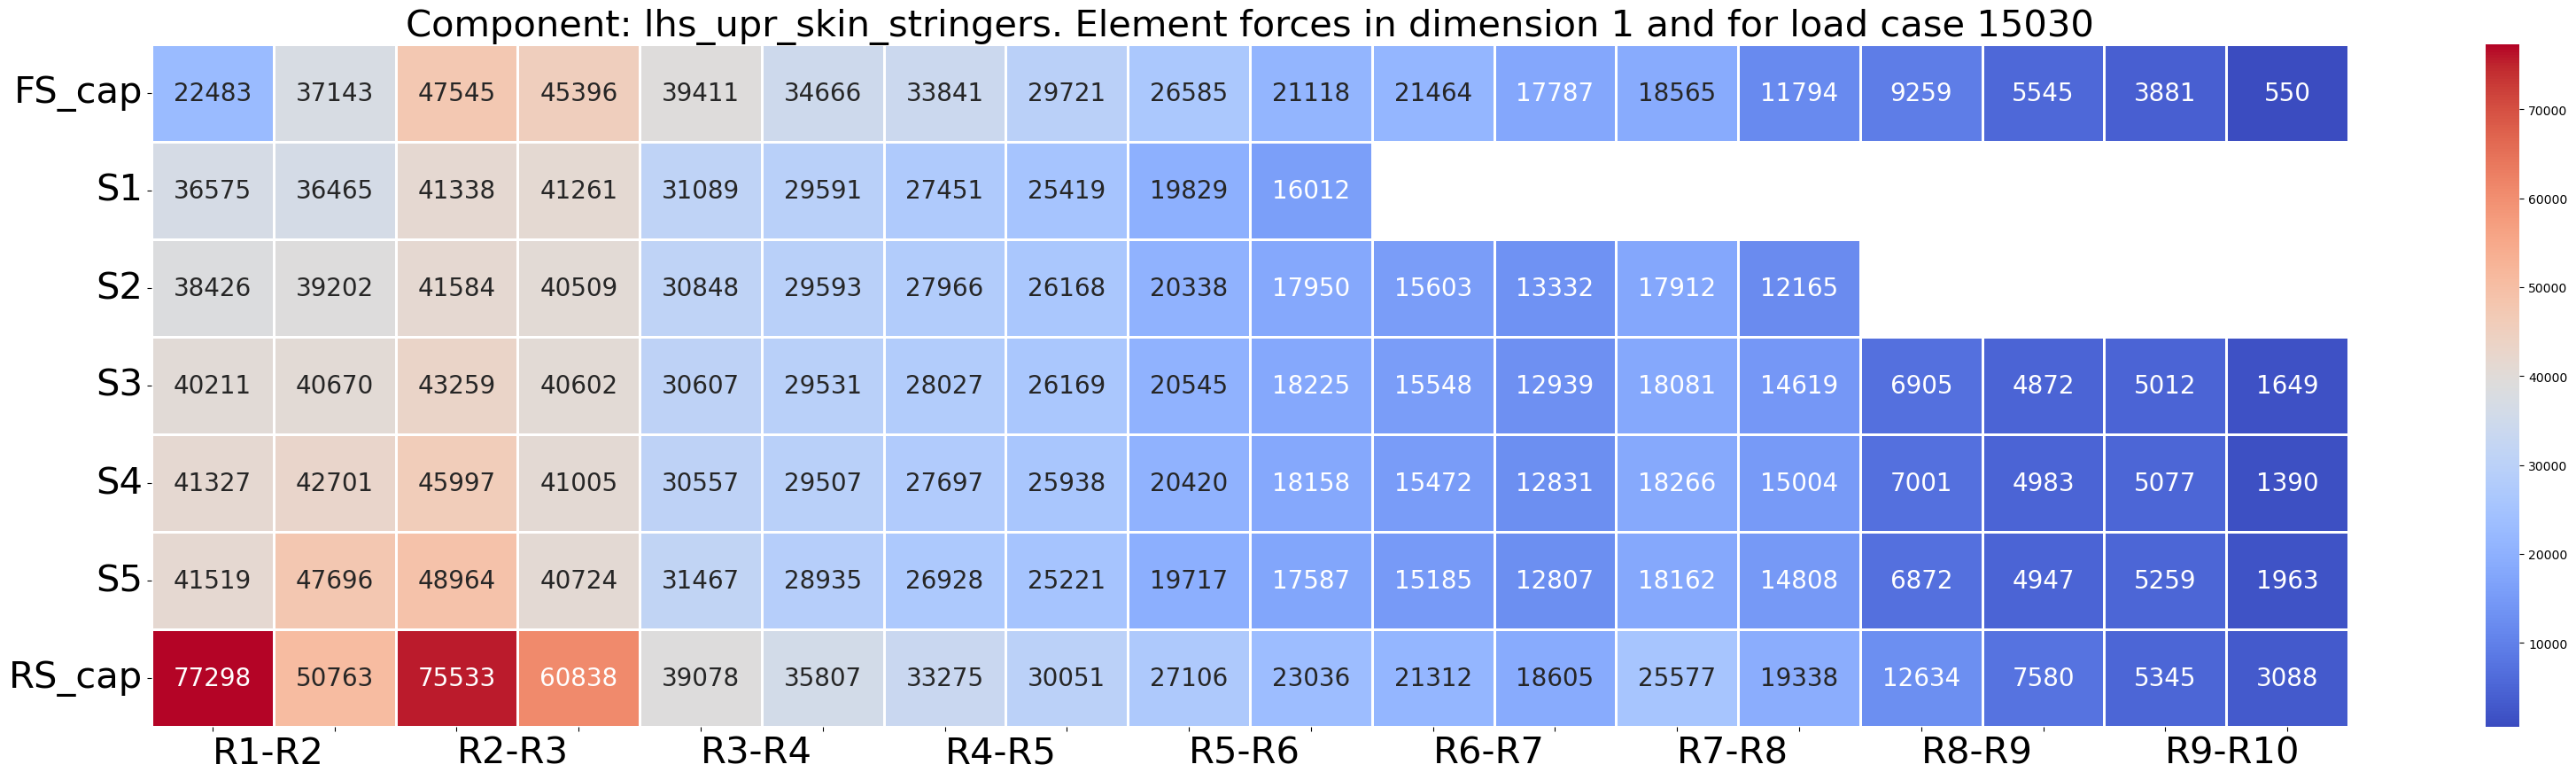

In [10]:
# Plotting mappings of element forces for a component, load case and field value
# Field value components acc. to order in .op2/.f06 file
# If excel = True, results will be saved in the excel file created at variable initialization

M100_model.plot_1D_eforces(15030, 'lhs_upr_skin_stringers', 1, excel=True)

Results saved in excel workbook: data/M100-OPTISTRUCT/SOLVER/M100-HTP-LL1.1_Issue2.0.xlsx


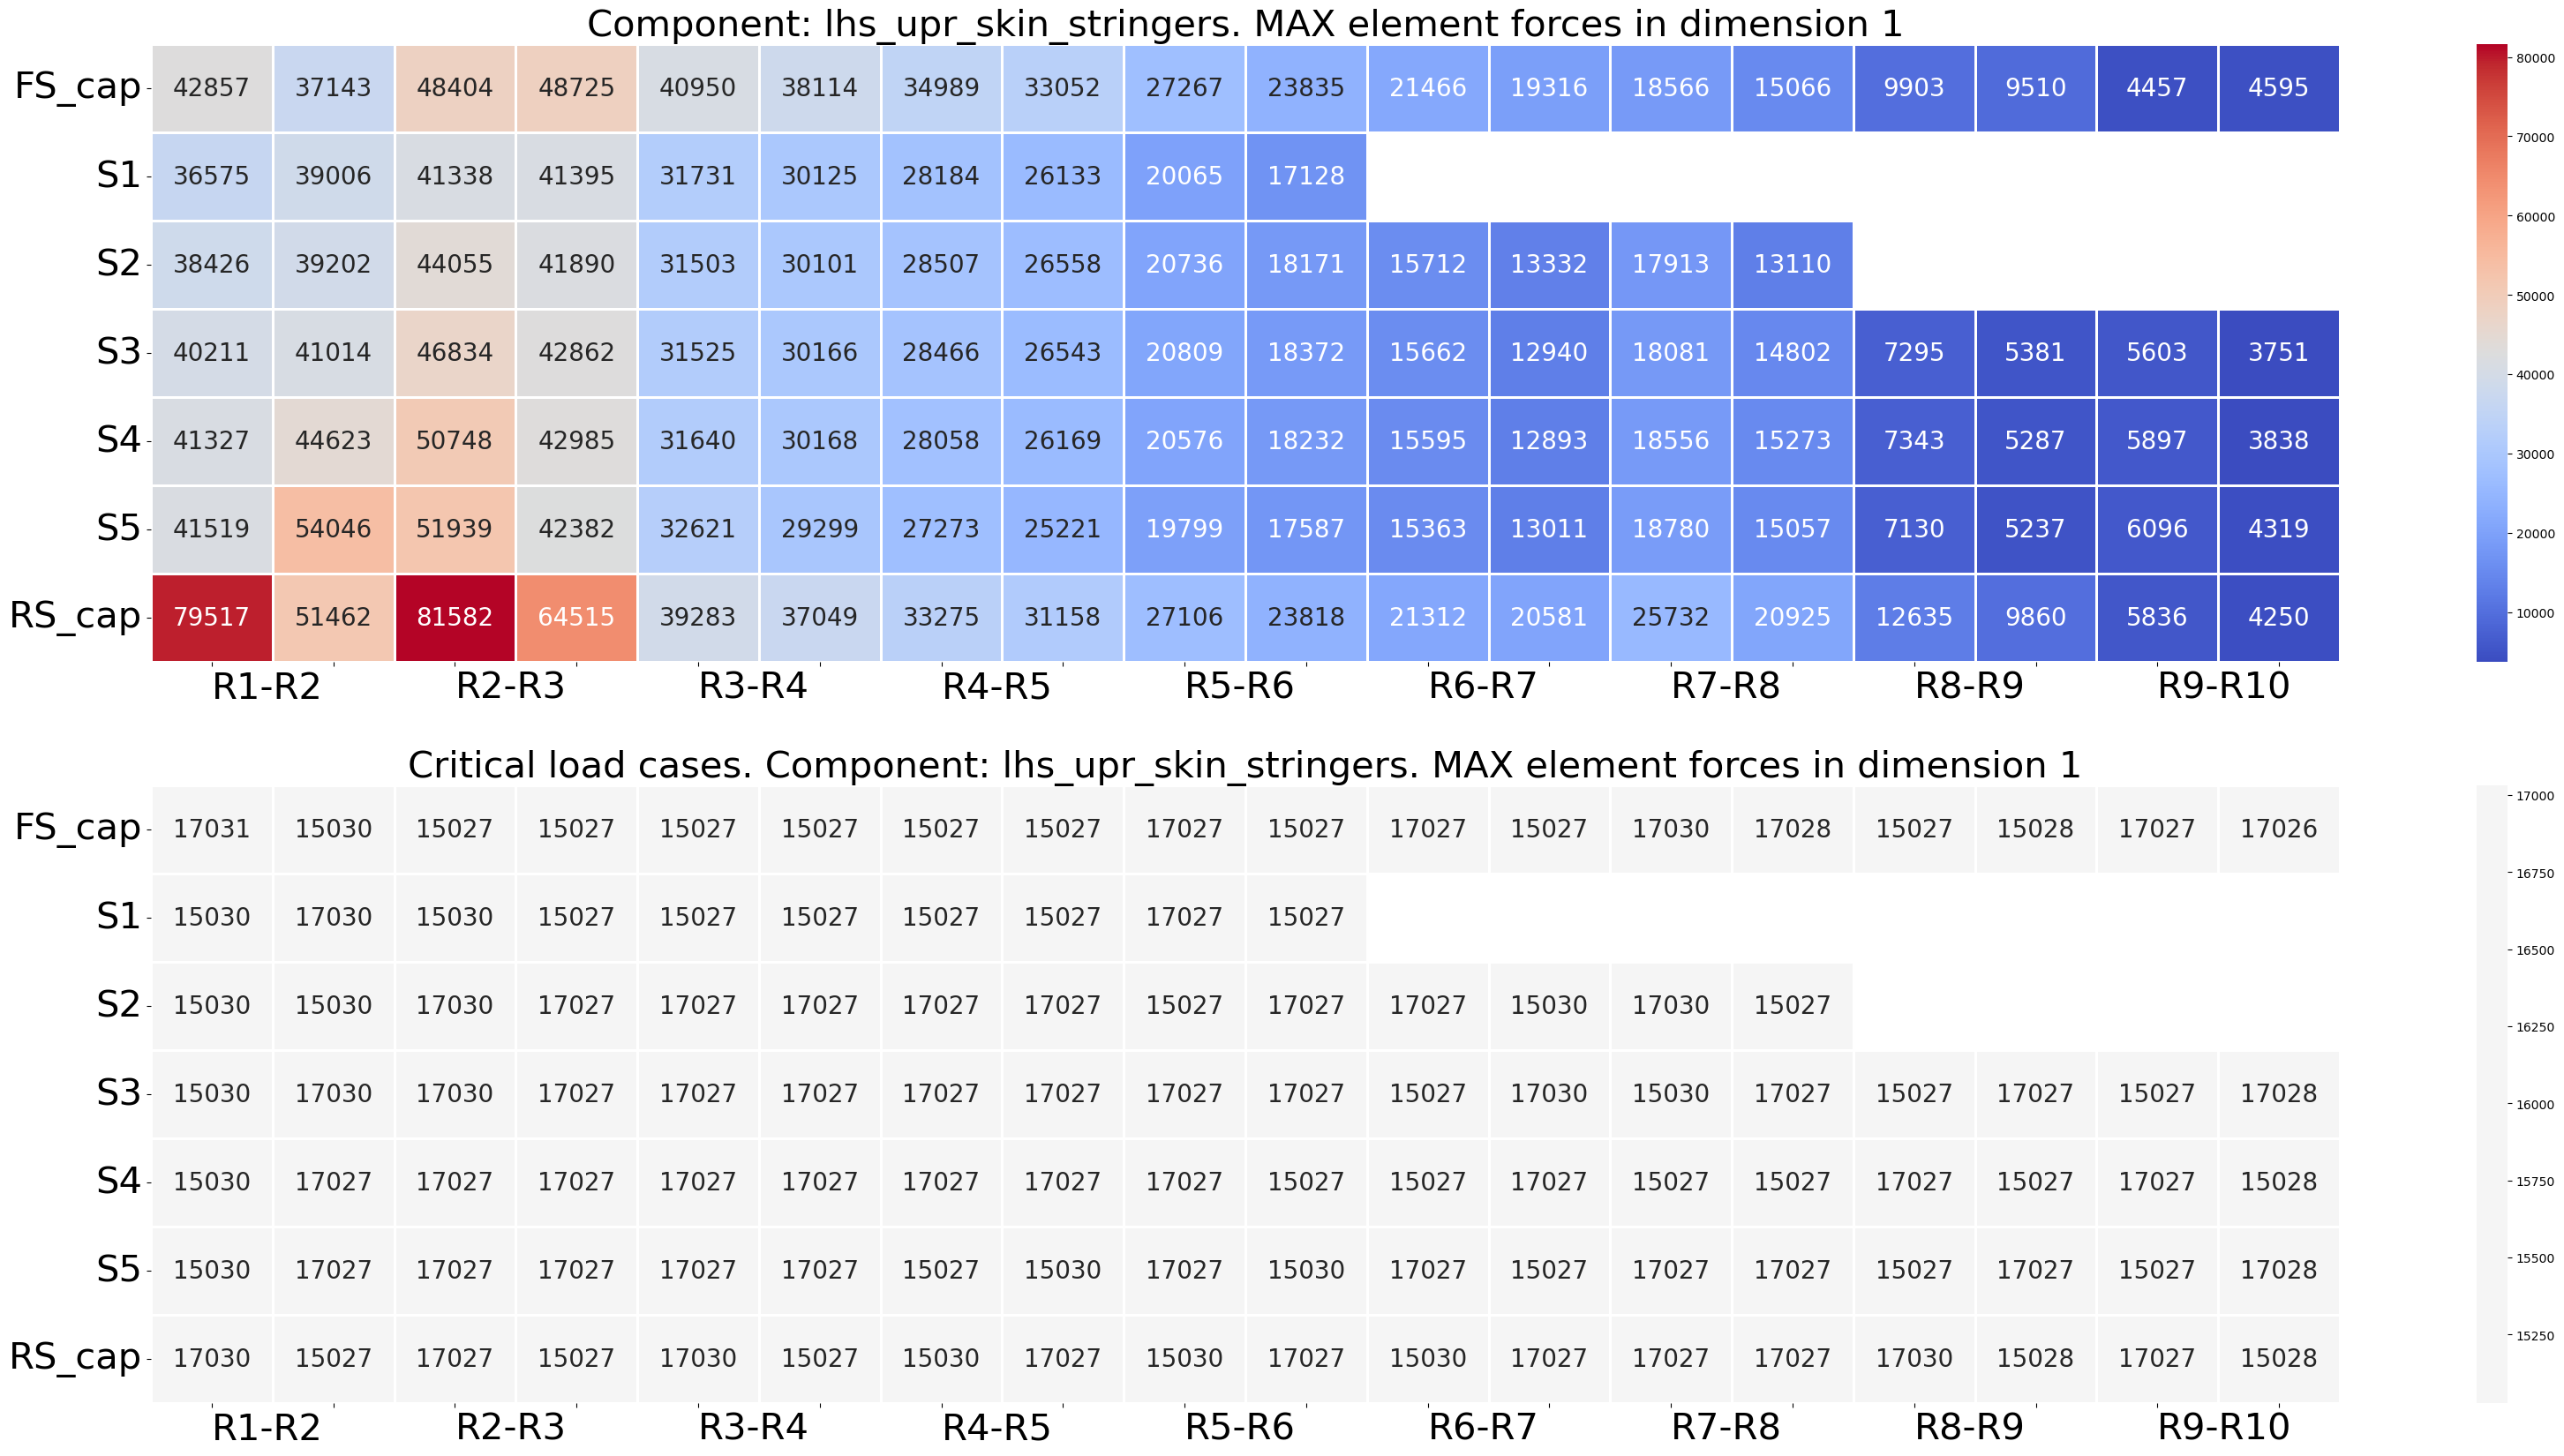

In [11]:
# Plotting mappings of maximum elemment forces and CLC for a specific component for all load cases in the .op2 file
# Field value components acc. to order in .op2/.f06 file
# If excel = True, results will be saved in the excel file created at variable initialization

M100_model.plot_env_1D_eforces('lhs_upr_skin_stringers', 'MAX', 1, excel=True)